In [1]:
import tensorflow as tf

2024-07-11 15:00:15.072968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# tf.data.Dataset()

Represents a potentially large set of elements.

The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

* Create a source dataset from your input data.
* Apply dataset transformations to preprocess the data.
* Iterate over the dataset and process the elements.

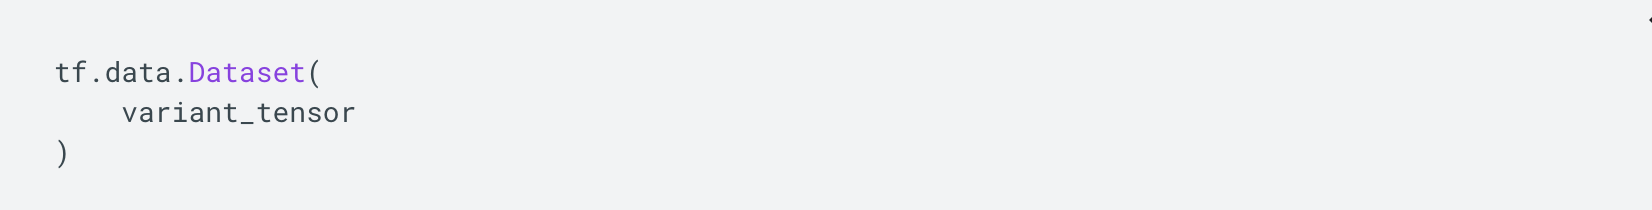

Link: https://www.tensorflow.org/api_docs/python/tf/data/Dataset


### Tensorflow dataset methods:

1. as_numpy_iterator(): https://www.tensorflow.org/api_docs/python/tf/data/NumpyIterator
2. take() 
3. filter()
4. map()
5. shuffle()
6. batch()

In [2]:
# Creating a tf Dataset from a list
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]

tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

### What is the Tensorflow Input Pipeline?

The input pipeline is a quick and easy utility provided in tf.dataapi to make complex input pipelines from simple and reusable codes and all in few lines of code. It also allows handling a large amount of data, thus giving low-end machines an advantage in computing them.

It does it by wrapping the data into tf.data.dataset class and performing a series of operations on them called ETL - Extract, Transform, Load.

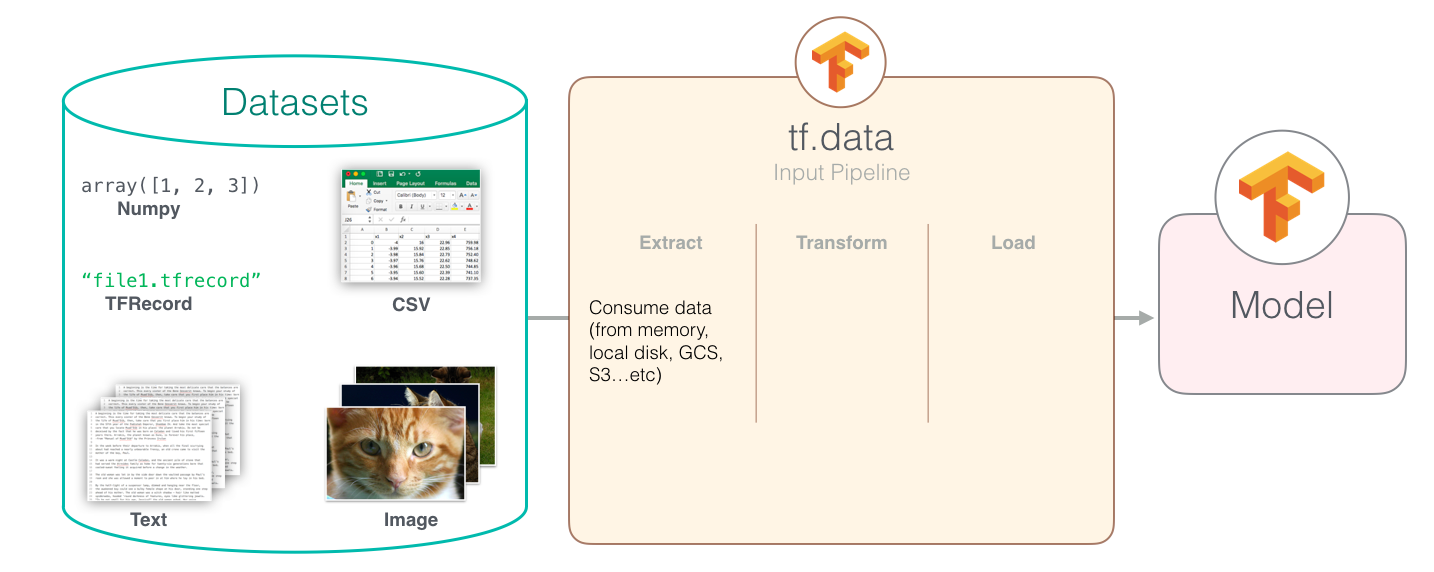


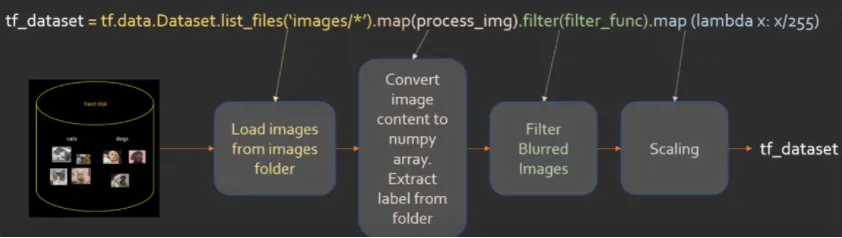

## Steps in an input pipeline:

1. Loading data
2. Converting data to numpy array
3. filtering unwanted (blurred/null/etc.) data
4. Scaling
5. Shuffling
6. Batching, etc.

In [3]:
# Iterating through tf dataset
for sales in tf_dataset:
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


2024-07-11 15:02:23.151602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# Iterating through tf dataset as numpy elements
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


2024-07-11 15:02:33.564748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Returning first n elements
for sales in tf_dataset.take(3):
    print(sales.numpy())

21
22
-108


2024-07-11 15:02:47.595003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# Filtering out certain elements from tf dataset
tf_dataset = tf_dataset.filter(lambda x: x>0)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
31
32
34
31


2024-07-11 15:02:55.320927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
# Converting each element based on a lambda fn (Scaling)
tf_dataset = tf_dataset.map(lambda x: x*72)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
1584
2232
2304
2448
2232


2024-07-11 15:03:04.049972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
# Shuffling dataset
tf_dataset = tf_dataset.shuffle(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
1584
2232
2304
2232
2448


2024-07-11 15:03:21.955364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Batching
for sales_batch in tf_dataset.batch(2):
    print(sales_batch.numpy())

[1584 2232]
[2304 1512]
[2448 2232]


2024-07-11 15:12:48.597618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### One-liner code:

All these above steps can be implemented in a single like of code to create a tensorflow data input pipeline .

In [10]:
# Doing everything together
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x: x>0).map(lambda y: y*72).shuffle(2).batch(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[1584 1512]
[2232 2304]
[2448 2232]


2024-07-11 15:13:10.071571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Working with Images

### .list_files():
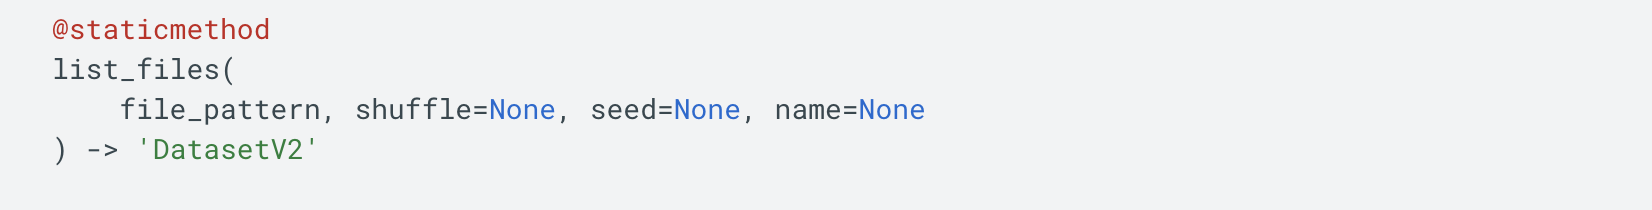

A dataset of all files matching one or more glob patterns.

The file_pattern argument should be a small number of glob patterns. If your filenames have already been globbed, use Dataset.from_tensor_slices(filenames) instead, as re-globbing every filename with list_files may result in poor performance with remote storage systems.

In [11]:
images_ds = tf.data.Dataset.list_files('images/*/*', shuffle=False)

In [12]:
image_count = len(images_ds)
image_count

130

In [13]:
type(images_ds)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [14]:
for file in images_ds.take(3):
    print(file.numpy())

b'images/cat/20 Reasons Why Cats Make the Best Pets....jpg'
b'images/cat/7 Foods Your Cat Can_t Eat.jpg'
b'images/cat/A cat appears to have caught the....jpg'


2024-07-11 15:21:06.296927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
class_names = ["cat","dog"]

In [16]:
train_size = int(image_count*0.8)
train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [17]:
len(train_ds)

104

In [18]:
len(test_ds)

26

In [19]:
def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

In [34]:
get_label("/images/dog/10%20Teacup%20Dog%20Breeds%20for%20Tiny%20Canine%20Lovers.jpg")

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

In [29]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    return img, label

In [40]:
img, label = process_image("./images/dog/25 Low-Maintenance Dog Breeds for....jpg")
img.numpy()[:2]

array([[[ 79.234375,  79.234375,  79.234375],
        [ 69.64453 ,  69.64453 ,  69.64453 ],
        [ 83.34717 ,  83.34717 ,  83.34717 ],
        [ 99.251465,  99.251465,  99.251465],
        [ 62.816406,  62.816406,  62.816406],
        [ 96.51904 ,  96.51904 ,  96.51904 ],
        [ 65.68799 ,  65.68799 ,  65.68799 ],
        [ 89.43408 ,  89.43408 ,  89.43408 ],
        [ 69.58301 ,  69.58301 ,  69.58301 ],
        [ 67.78223 ,  67.78223 ,  67.78223 ],
        [ 92.293945,  92.293945,  92.293945],
        [ 66.31201 ,  66.31201 ,  66.31201 ],
        [ 78.51416 ,  78.51416 ,  78.51416 ],
        [154.47705 , 154.47705 , 154.47705 ],
        [113.887695, 113.887695, 113.887695],
        [121.71826 , 121.71826 , 121.71826 ],
        [119.11914 , 119.11914 , 119.11914 ],
        [105.348145, 105.348145, 105.348145],
        [ 29.401855,  29.401855,  29.401855],
        [ 59.512207,  59.512207,  59.512207],
        [ 59.015137,  59.015137,  59.015137],
        [ 60.020508,  60.020508,  

In [41]:
train_ds = train_ds.map(process_image)
test_ds = test_ds.map(process_image)

In [42]:
for image, label in train_ds.take(1):
    print("****",image)
    print("****",label)

**** tf.Tensor(
[[[155.       186.       215.      ]
  [156.       187.       216.      ]
  [158.       189.       218.      ]
  ...
  [ 90.99609   84.99609   72.99609 ]
  [ 92.        86.        74.      ]
  [ 93.        87.        75.      ]]

 [[156.01172  187.01172  216.01172 ]
  [157.02344  188.02344  217.02344 ]
  [159.01172  190.01172  219.01172 ]
  ...
  [ 86.98828   82.97656   74.01172 ]
  [ 89.97656   85.96484   77.      ]
  [ 91.        86.98828   78.02344 ]]

 [[159.       190.       219.      ]
  [160.       191.       220.      ]
  [161.01953  192.01953  221.01953 ]
  ...
  [ 80.96094   77.96094   72.96094 ]
  [ 85.        82.        77.      ]
  [ 87.        84.        79.      ]]

 ...

 [[ 91.09766   44.98047   73.17578 ]
  [108.25781   83.16016   86.25781 ]
  [ 36.058594  33.058594  18.058594]
  ...
  [ 51.234375  32.214844  34.195312]
  [ 41.078125  18.078125  26.078125]
  [ 38.941406  24.941406  23.941406]]

 [[141.90625  123.88281  111.91797 ]
  [ 69.91797   58.894

2024-07-11 15:37:31.956718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [43]:
def scale(image, label):
    return image/255, label

In [44]:
train_ds = train_ds.map(scale)

In [45]:
for image, label in train_ds.take(5):
    print("****Image: ",image.numpy()[0][0])
    print("****Label: ",label.numpy())

****Image:  [0.60784316 0.7294118  0.84313726]
****Label:  b'cat'
****Image:  [0.6878983  0.69181985 0.672212  ]
****Label:  b'cat'
****Image:  [0.7736826  0.8089767  0.79120713]
****Label:  b'cat'
****Image:  [0.38330558 0.6778809  0.3122568 ]
****Label:  b'cat'
****Image:  [0.03924632 0.07846201 0.04316789]
****Label:  b'cat'


2024-07-11 15:38:07.198691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
